In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import id_gan

Using device cuda
Files already downloaded and verified


[epoch 19] loss = 887.0397: 100%|██████████| 25440/25440 [33:04<00:00, 12.82it/s]


Saving VAE model to output/celeba_vae.pt


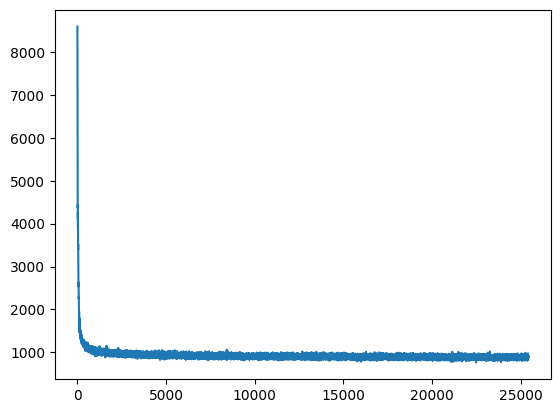

In [4]:
results = id_gan.train_vae("celeba", batch_size=128, num_workers=8, epochs=20)
plt.plot(results["loss"])

Loading VAE model from output/celeba_vae.pt


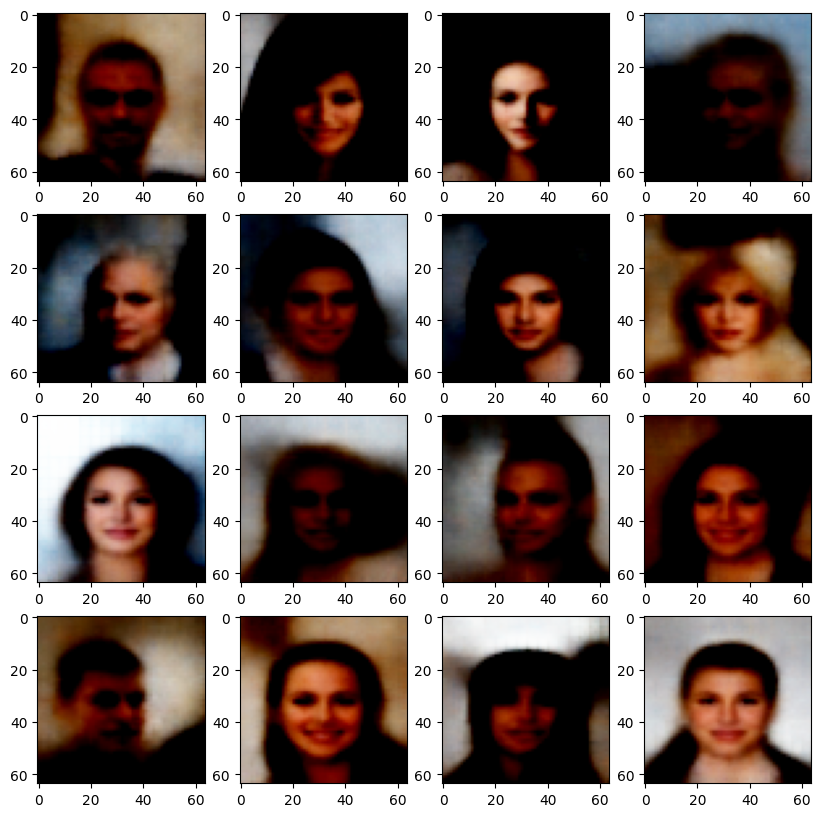

In [19]:
vae = id_gan.load_vae("celeba")

with torch.no_grad():
    images = vae.sample(16).cpu().numpy()
    
images = np.clip(images, 0, 1)

plt.figure(figsize=(10, 10))
for ind, image in enumerate(images):
    plt.subplot(4, 4, ind+1)
    plt.imshow(image.transpose(1, 2, 0))
plt.show()

Using device cuda
Loading VAE model from output/celeba_vae.pt
Files already downloaded and verified


[epoch 19] G_loss = 3.4043, D_loss = 0.7526: 100%|██████████| 25440/25440 [31:50<00:00, 13.32it/s]


Saving GAN model to output/celeba_gan_g.pt, output/celeba_gan_d.pt


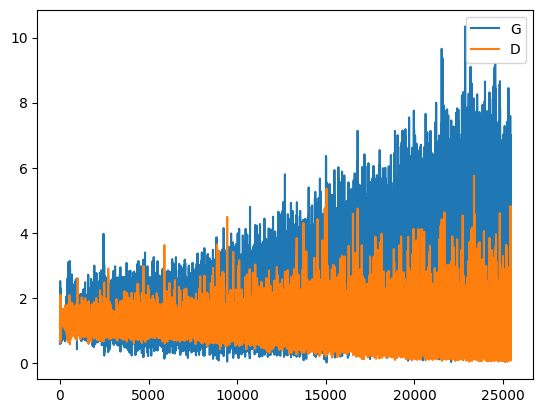

In [4]:
results = id_gan.train_gan("celeba", epochs=20, num_workers=8, batch_size=128)

plt.plot(results["loss_g"], label="G")
plt.plot(results["loss_d"], label="D")
plt.legend()
plt.show()

Loading GAN model from output/celeba_gan_g.pt


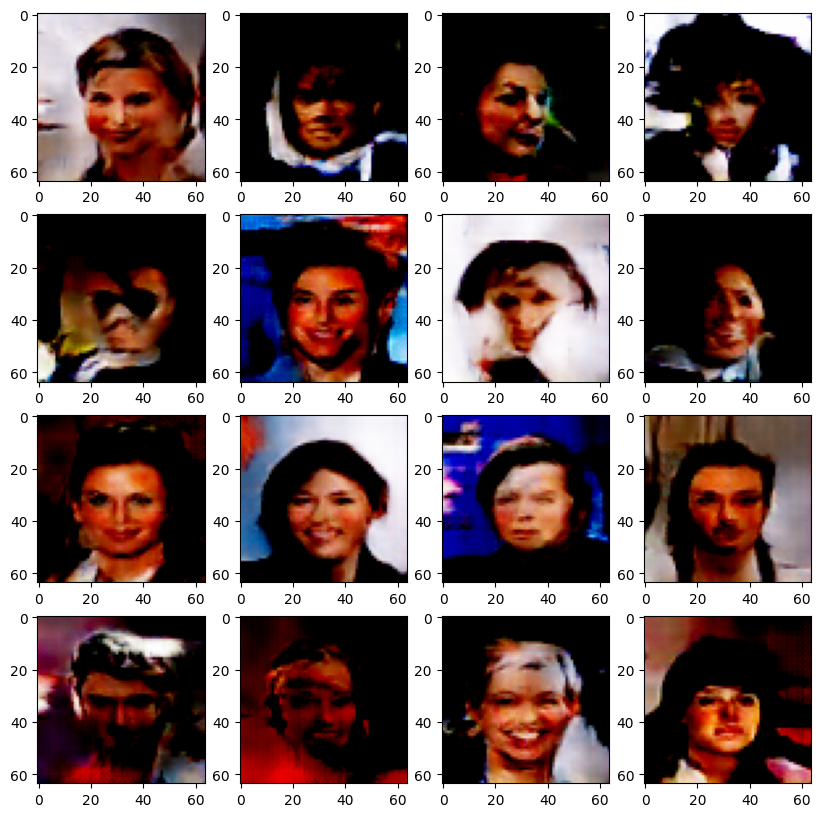

In [5]:
gan = id_gan.load_gan("celeba")

with torch.no_grad():
    z = torch.randn(16, 40)
    images = gan(z).cpu().numpy()

images = np.clip(images, 0, 1)

plt.figure(figsize=(10, 10))
for ind, image in enumerate(images):
    plt.subplot(4, 4, ind+1)
    plt.imshow(image.transpose(1, 2, 0))
plt.show()

## Conclusion

Similar to mnist dataset, the images from VAE are very blurred. The images from GAN are much sharper, but have a lot of artifacts. That should be solved by selecting proper model hyperparameters, but it requires runnig a lot of experiments, which takes quite a long time.